<a href="https://colab.research.google.com/github/frank-morales2020/MLxDL/blob/main/tf2024_200EPOCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/rasbt/python-machine-learning-book-3rd-edition/tree/master

In [ ]:
import tensorflow as tf
import numpy as np

np.set_printoptions(precision=3)
a = np.array([1, 2, 3], dtype=np.int32)
b = [4, 5, 6]
t_a = tf.convert_to_tensor(a)
t_b = tf.convert_to_tensor(b)
print(t_a)
print(t_b)

# Create tensors using tf.constant if you need to explicitly define them
t_c = tf.constant([1, 2, 3], dtype=tf.int32)
t_d = tf.constant([4, 5, 6], dtype=tf.int32)

print(t_c)
print(t_d)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor([4 5 6], shape=(3,), dtype=int32)
tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor([4 5 6], shape=(3,), dtype=int32)


In [ ]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)

In [ ]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,
random_state=0)

# standardize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[4.843 2.416 1.548 0.961 0.842 0.662 0.518 0.347 0.313 0.108 0.214 0.154
 0.181]


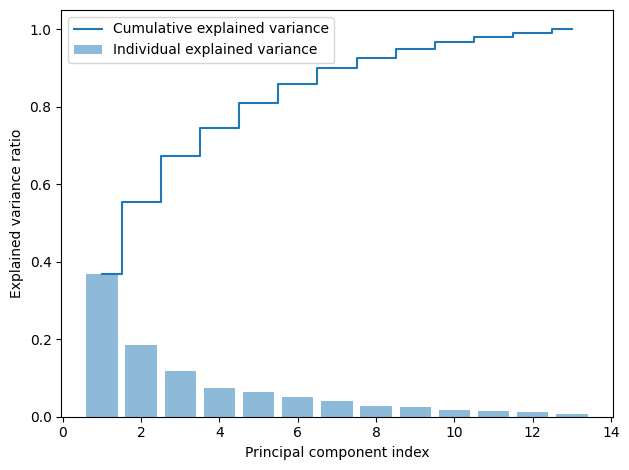

In [ ]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, alpha=0.5, align='center',label='Individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf
print(tf.__version__)
#'2.0.0'
print("GPU Available:", tf.test.is_gpu_available()) # GPU Available: True
if tf.test.is_gpu_available():
    device_name = tf.test.gpu_device_name()
else:
    pass
    device_name = 'CPU:0'
print(device_name)
# '/device:GPU:0'

2.17.0
GPU Available: False
CPU:0


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np

import matplotlib.pyplot as plt
## define a function for the generator:
def make_generator_network(num_hidden_layers=1, num_hidden_units=100, num_output_units=784):
    model = tf.keras.Sequential()
    for i in range(num_hidden_layers):
        model.add( tf.keras.layers.Dense(
        units=num_hidden_units, use_bias=False))
        model.add(tf.keras.layers.LeakyReLU())
        model.add( tf.keras.layers.Dense(
        units=num_output_units, activation='tanh'))
    return model

## define a function for the discriminator:
def make_discriminator_network(num_hidden_layers=1, num_hidden_units=100, num_output_units=1):
        model = tf.keras.Sequential()
        for i in range(num_hidden_layers):
            model.add( tf.keras.layers.Dense(units=num_hidden_units))
            model.add(tf.keras.layers.LeakyReLU())
            model.add(tf.keras.layers.Dropout(rate=0.5))
            model.add( tf.keras.layers.Dense(
            units=num_output_units, activation=None))
        return model

In [ ]:
image_size = (28, 28)
z_size = 20
mode_z = 'uniform' # 'uniform' vs. 'normal'  gen_hidden_layers = 1
gen_hidden_size = 100

gen_hidden_layers = 1
gen_hidden_size = 100

# Create the generator network
gen_model = make_generator_network(num_hidden_layers=gen_hidden_layers,
num_hidden_units=gen_hidden_size, num_output_units=np.prod(image_size))

gen_model.build(input_shape=(None, z_size))
#Model: "sequential"
gen_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │           2,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 784)                 │          79,184 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,184 (317.12 KB)

 Trainable params: 81,184 (317.12 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
disc_hidden_layers = 1
disc_hidden_size = 100
disc_model = make_discriminator_network(num_hidden_layers=disc_hidden_layers,num_hidden_units=disc_hidden_size)
disc_model.build(input_shape=(None, np.prod(image_size)))
disc_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 78,601 (307.04 KB)

 Trainable params: 78,601 (307.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
disc_model = make_discriminator_network(num_hidden_layers=disc_hidden_layers,num_hidden_units=disc_hidden_size)
disc_model.build(input_shape=(None, np.prod(image_size)))
disc_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 78,601 (307.04 KB)

 Trainable params: 78,601 (307.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
mnist_bldr = tfds.builder('mnist')
mnist_bldr.download_and_prepare()
mnist = mnist_bldr.as_dataset(shuffle_files=False)

batch_size = 32 # Define the batch size here

def preprocess(ex, mode='uniform'):
    image = ex['image']
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.reshape(image, [-1])
    image = image*2 - 1.0
    if mode == 'uniform':
      input_z = tf.random.uniform(
      shape=(z_size,), minval=-1.0, maxval=1.0)
    elif mode == 'normal':
      input_z = tf.random.normal(shape=(z_size,))

    return input_z, image

mnist_trainset = mnist['train']
mnist_trainset = mnist_trainset.map(preprocess).batch(batch_size) # Add batching here

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
input_z, input_real = next(iter(mnist_trainset))
print('input-z -- shape: ', input_z.shape)
print('input-real -- shape:', input_real.shape)

g_output = gen_model(input_z)
print('Output of G -- shape:', g_output.shape)
d_logits_real = disc_model(input_real)
d_logits_fake = disc_model(g_output)
print('Disc. (real) -- shape:', d_logits_real.shape)
print('Disc. (fake) -- shape:', d_logits_fake.shape)

input-z -- shape:  (32, 20)
input-real -- shape: (32, 784)
Output of G -- shape: (32, 784)
Disc. (real) -- shape: (32, 1)
Disc. (fake) -- shape: (32, 1)


In [ ]:
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)
## Loss for the Generator
g_labels_real = tf.ones_like(d_logits_fake)
g_loss = loss_fn(y_true=g_labels_real, y_pred=d_logits_fake)
print('Generator Loss: {:.4f}'.format(g_loss))

d_labels_real = tf.ones_like(d_logits_real)
d_labels_fake = tf.zeros_like(d_logits_fake)
d_loss_real = loss_fn(y_true=d_labels_real,y_pred=d_logits_real)
d_loss_fake = loss_fn(y_true=d_labels_fake, y_pred=d_logits_fake)
print('Discriminator Losses: Real {:.4f} Fake {:.4f}' .format(d_loss_real.numpy(), d_loss_fake.numpy()))

Generator Loss: 0.7846
Discriminator Losses: Real 1.8640 Fake 0.6176


In [ ]:
num_epochs = 00
batch_size = 64
image_size = (28, 28)
z_size = 20
mode_z = 'uniform'
gen_hidden_layers = 1
gen_hidden_size = 100
disc_hidden_layers = 1
disc_hidden_size = 100
tf.random.set_seed(1)
np.random.seed(1)

mnist_bldr = tfds.builder('mnist')
mnist_bldr.download_and_prepare()
mnist = mnist_bldr.as_dataset(shuffle_files=False)
mnist_trainset = mnist['train']

if mode_z == 'uniform':
    fixed_z = tf.random.uniform( shape=(batch_size, z_size), minval=-1, maxval=1)
elif mode_z == 'normal':
    fixed_z = tf.random.normal(shape=(batch_size, z_size))

def create_samples(g_model, input_z):
    g_output = g_model(input_z, training=False)
    images = tf.reshape(g_output, (batch_size, *image_size))
    return (images+1)/2.0

#mnist_trainset = mnist['train']
mnist_trainset = mnist_trainset.map(lambda ex: preprocess(ex, mode=mode_z))
mnist_trainset = mnist_trainset.shuffle(10000)
mnist_trainset = mnist_trainset.batch(batch_size, drop_remainder=True)

## Set-up the model
with tf.device(device_name):
      gen_model = make_generator_network(
      num_hidden_layers=gen_hidden_layers, num_hidden_units=gen_hidden_size, num_output_units=np.prod(image_size))
      gen_model.build(input_shape=(None, z_size))
      disc_model = make_discriminator_network( num_hidden_layers=disc_hidden_layers, num_hidden_units=disc_hidden_size)
      disc_model.build(input_shape=(None, np.prod(image_size)))

In [ ]:
import time
## Optimizers:
g_optimizer = tf.keras.optimizers.Adam()
## Loss function and optimizers:
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)
d_optimizer = tf.keras.optimizers.Adam()
all_losses = []
all_d_vals = []
epoch_samples = []

start_time = time.time()
for epoch in range(1, num_epochs+1):
    epoch_losses, epoch_d_vals = [], []
    for i,(input_z,input_real) in enumerate(mnist_trainset):
        ## Compute generator's loss
        with tf.GradientTape() as g_tape:
          g_output = gen_model(input_z)
          d_logits_fake = disc_model(g_output, training=True)
          labels_real = tf.ones_like(d_logits_fake)
          g_loss = loss_fn(y_true=labels_real, y_pred=d_logits_fake)
        ## Compute the gradients of g_loss
        g_grads = g_tape.gradient(g_loss, gen_model.trainable_variables)
        ## Optimization: Apply the gradients
        g_optimizer.apply_gradients( grads_and_vars=zip(g_grads, gen_model.trainable_variables))

        ## Compute discriminator's loss
        with tf.GradientTape() as d_tape:
          d_logits_real = disc_model(input_real, training=True)
          d_labels_real = tf.ones_like(d_logits_real)
          d_loss_real = loss_fn(y_true=d_labels_real, y_pred=d_logits_real)
          d_logits_fake = disc_model(g_output, training=True)
          d_labels_fake = tf.zeros_like(d_logits_fake)
          d_loss_fake = loss_fn(y_true=d_labels_fake, y_pred=d_logits_fake)
          d_loss = d_loss_real + d_loss_fake

        ## Compute the gradients of d_loss
        d_grads = d_tape.gradient(d_loss, disc_model.trainable_variables)

        ## Optimization: Apply the gradients
        d_optimizer.apply_gradients( grads_and_vars=zip(d_grads, disc_model.trainable_variables))
        epoch_losses.append( (g_loss.numpy(), d_loss.numpy(),
        d_loss_real.numpy(), d_loss_fake.numpy()))

        d_probs_real = tf.reduce_mean( tf.sigmoid(d_logits_real))
        d_probs_fake = tf.reduce_mean( tf.sigmoid(d_logits_fake))

        epoch_d_vals.append((d_probs_real.numpy(), d_probs_fake.numpy()))
    all_losses.append(epoch_losses)
    all_d_vals.append(epoch_d_vals)

    #print(epoch, (time.time() - start_time)/60,
    #*list(np.mean(all_losses[-1], axis=0)))

    print('Epoch {:03d} | ET {:.2f} min | Avg Losses >> G/D {:.4f}/{:.4f} [D-Real: {:.4f} D-Fake: {:.4f}]' .format(epoch, (time.time() - start_time)/60, *list(np.mean(all_losses[-1], axis=0))))
    epoch_samples.append(create_samples(gen_model, fixed_z).numpy())









Epoch 001 | ET 1.53 min | Avg Losses >> G/D 2.9224/0.2564 [D-Real: 0.0290 D-Fake: 0.2274]
Epoch 002 | ET 2.99 min | Avg Losses >> G/D 5.0454/0.3367 [D-Real: 0.1134 D-Fake: 0.2233]
Epoch 003 | ET 4.45 min | Avg Losses >> G/D 3.1090/0.7224 [D-Real: 0.3302 D-Fake: 0.3922]
Epoch 004 | ET 5.92 min | Avg Losses >> G/D 2.1251/0.8419 [D-Real: 0.4337 D-Fake: 0.4082]
Epoch 005 | ET 7.39 min | Avg Losses >> G/D 2.0051/0.8298 [D-Real: 0.4568 D-Fake: 0.3730]
Epoch 006 | ET 8.85 min | Avg Losses >> G/D 1.8324/0.9101 [D-Real: 0.4860 D-Fake: 0.4240]
Epoch 007 | ET 10.31 min | Avg Losses >> G/D 1.4460/1.0501 [D-Real: 0.5640 D-Fake: 0.4861]
Epoch 008 | ET 12.68 min | Avg Losses >> G/D 1.5419/0.9920 [D-Real: 0.5365 D-Fake: 0.4555]
Epoch 009 | ET 14.14 min | Avg Losses >> G/D 1.5843/0.9985 [D-Real: 0.5378 D-Fake: 0.4607]
Epoch 010 | ET 15.60 min | Avg Losses >> G/D 1.4051/1.0251 [D-Real: 0.5578 D-Fake: 0.4673]
Epoch 011 | ET 17.07 min | Avg Losses >> G/D 1.3748/1.0617 [D-Real: 0.5687 D-Fake: 0.4930]
Epoch

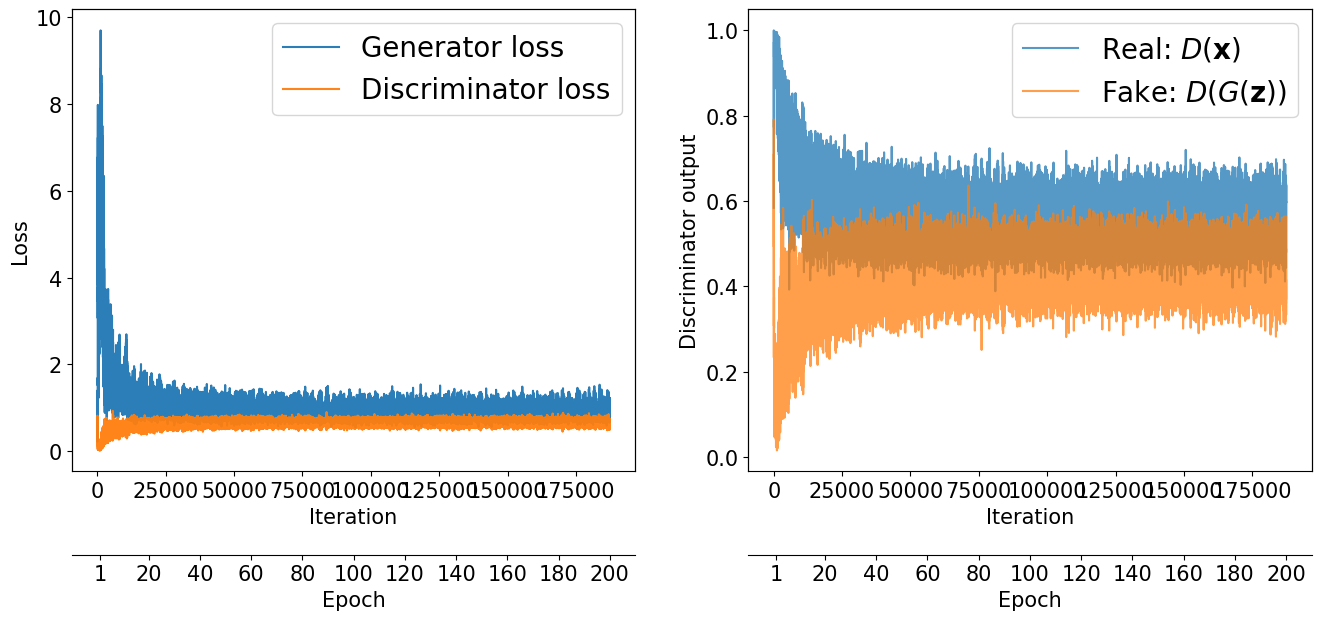

In [ ]:
import itertools
fig = plt.figure(figsize=(16, 6))

## Plotting the losses
ax = fig.add_subplot(1, 2, 1)
g_losses = [item[0] for item in itertools.chain(*all_losses)]
d_losses = [item[1]/2.0 for item in itertools.chain(*all_losses)]
plt.plot(g_losses, label='Generator loss', alpha=0.95)
plt.plot(d_losses, label='Discriminator loss', alpha=0.95)
plt.legend(fontsize=20)
ax.set_xlabel('Iteration', size=15)
ax.set_ylabel('Loss', size=15)


epochs = np.arange(1, 201)
epoch2iter = lambda e: e*len(all_losses[-1])
epoch_ticks = [1, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]

newpos = [epoch2iter(e) for e in epoch_ticks]
ax2 = ax.twiny()
ax2.set_xticks(newpos)
ax2.set_xticklabels(epoch_ticks)
ax2.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_label_position('bottom')
ax2.spines['bottom'].set_position(('outward', 60))
ax2.set_xlabel('Epoch', size=15)
ax2.set_xlim(ax.get_xlim())
ax.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)

## Plotting the outputs of the discriminator
ax = fig.add_subplot(1, 2, 2)
d_vals_real = [item[0] for item in itertools.chain(*all_d_vals)]
d_vals_fake = [item[1] for item in itertools.chain(*all_d_vals)]
plt.plot(d_vals_real, alpha=0.75,label=r'Real: $D(\mathbf{x})$')
plt.plot(d_vals_fake, alpha=0.75,label=r'Fake: $D(G(\mathbf{z}))$')
plt.legend(fontsize=20)
ax.set_xlabel('Iteration', size=15)
ax.set_ylabel('Discriminator output', size=15)
ax2 = ax.twiny()
ax2.set_xticks(newpos)
ax2.set_xticklabels(epoch_ticks)
ax2.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_label_position('bottom')
ax2.spines['bottom'].set_position(('outward', 60))
ax2.set_xlabel('Epoch', size=15)
ax2.set_xlim(ax.get_xlim())
ax.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
plt.show()

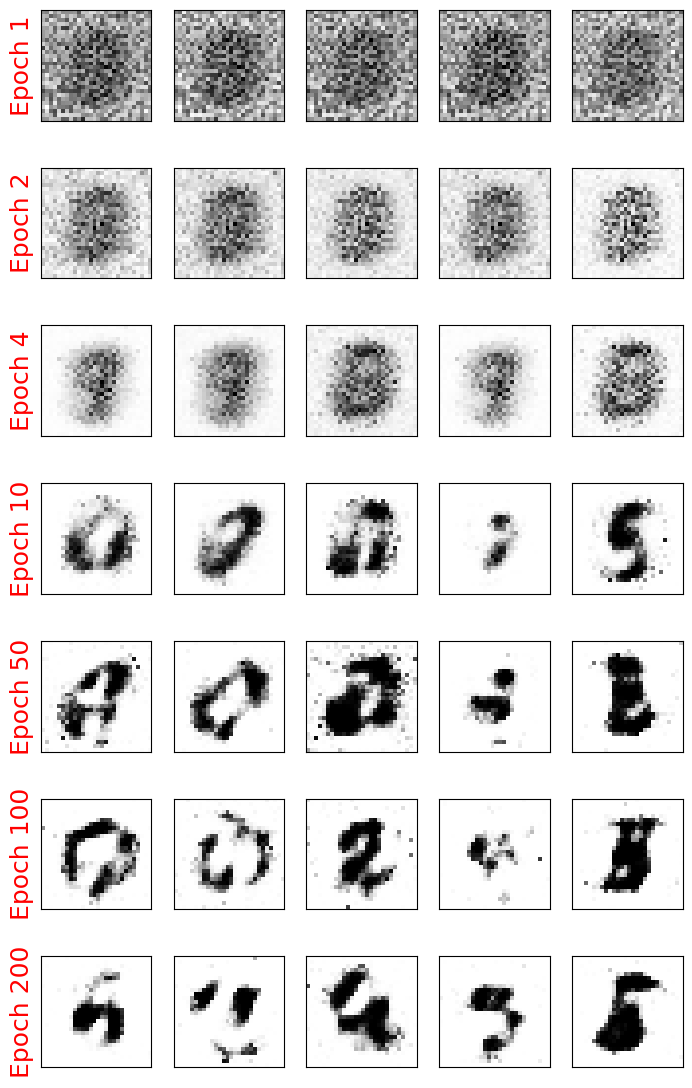

In [ ]:
#selected_epochs = [1, 2, 4, 10, 50, 100]
selected_epochs = [1, 2, 4, 10, 50, 100, 200]
fig = plt.figure(figsize=(10, 14))

for i,e in enumerate(selected_epochs):
    for j in range(5):
        ax = fig.add_subplot(7, 6, i*6+j+1)
        ax.set_xticks([])
        ax.set_yticks([])
        if j==0:
           ax.text(-0.06, 0.5, 'Epoch {}'.format(e), rotation=90, size=18, color='red', horizontalalignment='right', verticalalignment='center', transform=ax.transAxes)

        image = epoch_samples[e-1][j]
        ax.imshow(image, cmap='gray_r')

#plt.tight_layout()
plt.show()
